## Tracking sulfide saturation during magma evolution
- This Jupyter Notebook shows how to use the various functionalities of PySulfsat to track sulfide saturation during magma evolution
- It uses data from Wieser et al. (in prep) looking at sulfide saturation during evolution from a basalt to a dacite at Kilauea Volcano
- We have measured sulfide compositions using EDS on the SEM in various matrix glasses to give as an idea of how sulfide composition is changing with differentation. This allows us to compare this to sulfide composition predicted by different models
- We have also made a best fit liquid line of descent, using a MELTS model, with some linear fitting to measured data at lower MgO contents where MELTS begins to go wrong (i.e. missing apatite saturation)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

## 1. Load sulfide data

In [2]:
Sulfide_in=pd.read_excel('Sulfide_compositions.xlsx', sheet_name='Sheet1')
Sulfide_in.head()

,Unnamed: 0,S,Cu,Ni,Fe,Si,Al,Fe/Fe+Ni+Cu Raw,MgO Glass,SiO2_Glass,Al2O3_Glass,Si Glass,Al Glass,FeO Glass,Fe Glass,Ni Glass,Cu Glass,Xsulf_Si,Fe_Corr_Si,Ni Corr Sil,Cu Corr Sil,Fe/Fe+Ni+Cu Si Corr,Xsulf_Al,Fe_Corr_Si.1,Ni Corr Sil.1,Cu Corr Sil.1,Fe/Fe+Ni+Cu Si Corr.1,Diff Raw Fe/Fe vs. Si corrected
0,LL2_G12,29.19,5.76,0.32,57.15,5.47,2.10,0.914160,1.0622,64.3225,12.5764,30.068735,6.656152,8.2430,6.407359,1.725,21.7625,0.181917,63.172038,0.391120,7.040362,0.905935,0.315498,80.538058,0.467413,8.414547,0.911295,1.009079
1,LL2_G15,31.58,1.68,0.05,54.97,8.27,2.81,0.973024,1.0622,64.3225,12.5764,30.068735,6.656152,8.2430,6.407359,1.725,21.7625,0.275037,64.417038,0.068904,2.316532,0.968409,0.422166,90.449883,0.086404,2.907239,0.971670,1.004765
2,LL2_G4a,21.75,5.19,0.87,46.83,18.78,5.67,0.896803,1.0622,64.3225,12.5764,30.068735,6.656152,8.2430,6.407359,1.725,21.7625,0.624569,74.714132,2.317050,13.820492,0.838878,0.851844,279.244861,5.871178,35.022587,0.884780,1.069051
3,LL1_G2,31.47,23.91,6.89,35.64,0.92,0.64,0.563852,3.5761,53.4058,12.6915,24.965523,6.717069,11.9115,9.258918,43.940,119.0800,0.036851,36.048414,7.153449,24.824359,0.557415,0.095280,38.418295,7.615150,26.427794,0.557684,1.011548
4,LL1_G7,30.92,23.10,2.17,41.24,1.20,0.72,0.648374,3.5761,53.4058,12.6915,24.965523,6.717069,11.9115,9.258918,43.940,119.0800,0.048066,42.061752,2.279349,24.265794,0.641620,0.107190,45.079605,2.430000,25.873063,0.642808,1.010527


## 2. Load best fit liquid line of descent 
- This data is a MELTS model from Wieser et al. (2022) -  https://doi.org/10.1029/2021GC010046
- The addition of the Liq suffix might seem a bit odd, but this allows use of liquid-only thermometers from the Python3 Thermobarometry tool Thermobar

In [93]:
Liqs=ss.import_data('Dataset_S1.xlsx', 
            sheet_name='MELTS_Model_01H2O', suffix="_Liq")
Liqs.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Temp (K) MELTS,FeO,Fe2O3,H2O_Incom,Temp_HT1987_C,Factor,H2O_test
0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.248535,0.101655,0.0,0.0,0.0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.248535,0.101655,1445.220313,9.447747,1.852481,0.514405,1148.639387,1.000000,0.514405
1,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.250895,0.102621,0.0,0.0,0.0,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.250895,0.102621,1443.220313,9.475545,1.854419,0.519548,1146.706750,1.009998,0.519548
2,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.253478,0.103677,0.0,0.0,0.0,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.253478,0.103677,1441.220313,9.505299,1.856348,0.524889,1144.608472,1.020381,0.524889
3,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.257120,0.105167,0.0,0.0,0.0,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.257120,0.105167,1439.220313,9.568634,1.864716,0.535182,1142.809538,1.040389,0.535182
4,51.481354,2.721741,13.714324,11.384440,0.196378,6.342291,10.585430,2.491197,0.510364,0.262582,0.107401,0.0,0.0,0.0,51.481354,2.721741,13.714324,11.384440,0.196378,6.342291,10.585430,2.491197,0.510364,0.262582,0.107401,1437.220313,9.688901,1.884351,0.546507,1141.480047,1.062405,0.546507


## 3. Loading in measured data to compare to models
- Here we load in matrix glasses and melt inclusion compositions, again, all data published in Wieser et al. (2022)

In [94]:
# Im also loading in the matrix glass compositions and melt inclusions
MG=pd.read_excel('Dataset_S1.xlsx', sheet_name='Matrix_Glass_Data')
# Replace all floats with Nans
MG=MG.apply(pd.to_numeric, errors='coerce')

Plag_MIs=pd.read_excel('Dataset_S1.xlsx', sheet_name='Plagioclase_Hosted_MeltInc').apply(pd.to_numeric, errors='coerce')
Cpx_MIs=pd.read_excel('Dataset_S1.xlsx', sheet_name='Clinopyroxene_Hosted_MeltInc').apply(pd.to_numeric, errors='coerce')
Opx_MIs=pd.read_excel('Dataset_S1.xlsx', sheet_name='Orthopyroxene_hosted_MeltInc').apply(pd.to_numeric, errors='coerce')
Ol_MIs=pd.read_excel('Dataset_S1.xlsx', sheet_name='Olivine_Hosted_MeltInc').apply(pd.to_numeric, errors='coerce')

# Now combine all the different melt inclusions into a single dataset

MI_Combo=pd.concat([Plag_MIs, Cpx_MIs, Opx_MIs, Ol_MIs], axis=0)

## 4. Plotting major element trends

Text(0, 0.5, 'FeO$_{T}$ (wt%)')

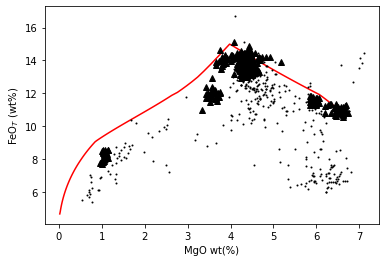

In [95]:
plt.plot(Liqs['MgO_Liq'], Liqs['FeOt_Liq'], '-r')
plt.plot(MG['MgO EPMA'], MG['FeO EPMA'], '^k')
plt.plot(MI_Combo['MgO_MI EPMA'], MI_Combo['FeO_MI EPMA'], 'ok', ms=1, mfc='white')
plt.xlabel('MgO wt(%)')
plt.ylabel('FeO$_{T}$ (wt%)')

## 5. Calculate temperature needed for SCSS models (as MELTS often overestimates temperatures)
- here I use Helz and Thornber, 1987, but lots of options exist in Thermobar

In [96]:
Liqs['temp_HT87']=pt.calculate_liq_only_temp(liq_comps=Liqs, equationT="T_Helz1987_MgO")

## 6. Calculate a regression strategy for Ni and Cu in the liquid
- If we want to predict the sulfide composition using Smythe or ONeill, we need the Ni and Cu contents in the liquid as a function of MgO
- Here, we make a regression through Ni and Cu contents measured by LA-ICP-MS
- For Ni, we fit a second degree polynomial, as it continues to decline across the fractionation interval
- For Cu, we fit a flat line at >4 wt% MgO, and a linear regression for lower MgO contents

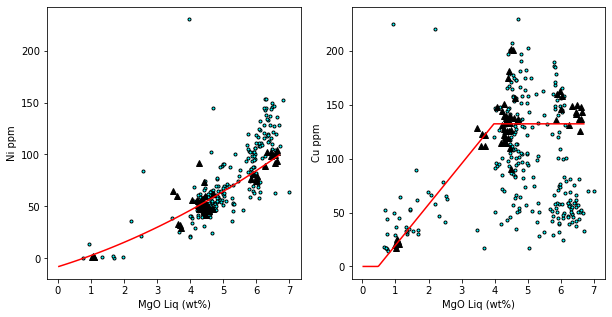

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(MI_Combo['MgO_MI EPMA'], MI_Combo['Ni_ppm_m60 LAICPMS'], 'ok', ms=3, mfc='cyan')

ax1.plot(MG['MgO EPMA'], MG['Ni_ppm_m60 LAICPMS'], '^k')
ax1.set_xlabel('MgO Liq (wt%)')
ax1.set_ylabel('Ni ppm')

# Polyfitting for Ni
mask_Ni= ~np.isnan(MG['MgO EPMA']) & ~np.isnan(MG['Ni_ppm_m60 LAICPMS'])
Pf_Ni = np.poly1d(np.polyfit(MG['MgO EPMA'].loc[mask_Ni], MG['Ni_ppm_m60 LAICPMS'].loc[mask_Ni], 2))
Px_Ni =Liqs['MgO_Liq']
Py_Ni = Pf_Ni(Px_Ni)

Liqs['Ni_modelled']=Py_Ni
ax1.plot(Liqs['MgO_Liq'], Liqs['Ni_modelled'], '-r')

ax2.plot(MI_Combo['MgO_MI EPMA'], MI_Combo['Cu_ppm_m65 LAICPMS'], 'ok', ms=3, mfc='cyan')
ax2.plot(MG['MgO EPMA'], MG['Cu_ppm_m65 LAICPMS'], '^k')
ax2.set_xlabel('MgO Liq (wt%)')
ax2.set_ylabel('Cu ppm')


# Polyfitting for Cu
mask_Cu= ~np.isnan(MG['MgO EPMA']) & ~np.isnan(MG['Cu_ppm_m65 LAICPMS']) & (MG['MgO EPMA']<4)
Pf_Cu = np.poly1d(np.polyfit(MG['MgO EPMA'].loc[mask_Cu], MG['Cu_ppm_m65 LAICPMS'].loc[mask_Cu], 1))


mask_low_MgO=Liqs['MgO_Liq']<4
Px_Cu =Liqs['MgO_Liq'].loc[mask_low_MgO]
Py_Cu = Pf_Cu(Px_Cu)

Liqs['Cu_modelled']=np.max(Py_Cu)
# Replacing any with <4 wt% MgO with the regression
Liqs.loc[(mask_low_MgO), 'Cu_modelled']=Py_Cu
# Replacing any negative values with zero
Liqs.loc[Liqs['Cu_modelled']<0, 'Cu_modelled']=0
ax2.plot(Liqs['MgO_Liq'], Liqs['Cu_modelled'], '-r')


## 7. Finally, lets use the MELTS model used to reconstruct the first part of the line to calculate how Fe3Fet_Liq is changing 

C:\Users\penny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 0, 'MgO Liq (wt%)')

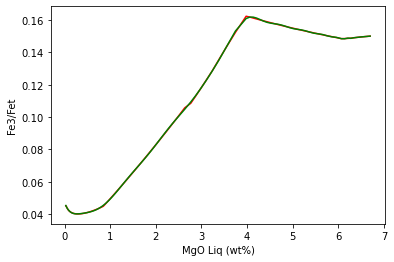

In [98]:
MELTS=pd.read_excel('Dataset_S1.xlsx', sheet_name='MELTS_Model_01H2O')
Fe3Fet_Liq=MELTS['Fe2O3']*0.8998/(MELTS['Fe2O3']*0.8998+MELTS['FeO'])
plt.plot(MELTS['MgO'], Fe3Fet_Liq, '-r')


Pf_MELTS = np.poly1d(np.polyfit(MELTS['MgO'], Fe3Fet_Liq, 100))
Px_MELTS =Liqs['MgO_Liq']
Py_MELTS = Pf_MELTS(Px_MELTS)
plt.plot(Liqs['MgO_Liq'], Py_MELTS, '-g')
Liqs['Fe3Fet_Liq']=Py_MELTS
plt.ylabel('Fe3/Fet')
plt.xlabel('MgO Liq (wt%)')

## 8. SCSS models using predicted sulfide composition
- First, lets use the Smythe et al. (2017) model to predict sulfide compositions, based on measured Ni and Cu contents in the liquid

In [99]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=Liqs, T_K=Liqs['temp_HT87'], 
P_kbar=0.6, Fe_FeNiCu_Sulf="Calc_Smythe",
Fe3Fet_Liq=Liqs['Fe3Fet_Liq'], Ni_Liq=Liqs['Ni_modelled'], Cu_Liq=Liqs['Cu_modelled'])

- Now we use the Oneill (2021) model, first using their method for calculating sulfide composition, and then using the Smythe algorithm

In [100]:
ONeill_CalcSulf=ss.calculate_ONeill2021_SCSS(df=Liqs, T_K=Liqs['temp_HT87'], P_kbar=0.6, 
    Fe_FeNiCu_Sulf="Calc_ONeill",
    Ni_Liq=Liqs['Ni_modelled'], Cu_Liq=Liqs['Cu_modelled'], Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])


ONeill_CalcSmythe_Sulf=ss.calculate_ONeill2021_SCSS(df=Liqs, T_K=Liqs['temp_HT87'], P_kbar=0.6, 
                           Fe_FeNiCu_Sulf="Calc_Smythe",
                           Ni_Liq=Liqs['Ni_modelled'], Cu_Liq=Liqs['Cu_modelled'], Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])

## 9. Lets compare these predictions to measured sulfide compositions
- For each sulfide, we have calculated an equivalent MgO content based on the melt or crystal it is hosted within 

Text(0, 0.5, 'Cu/(Cu + Fe + Ni)')

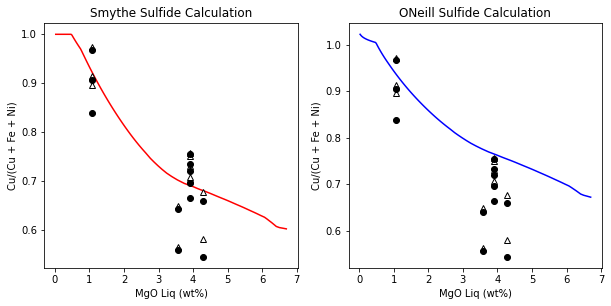

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4.5))
ax1.set_title('Smythe Sulfide Calculation')
ax1.plot(Smythe_CalcSulf['MgO_Liq'], Smythe_CalcSulf['Fe_FeNiCu_Sulf_calc'], '-r')
ax1.plot(Sulfide_in['MgO Glass'], Sulfide_in['Fe/Fe+Ni+Cu Raw'], '^k', mfc='white')
ax1.plot(Sulfide_in['MgO Glass'], Sulfide_in['Fe/Fe+Ni+Cu Si Corr'], 'ok')

ax1.set_xlabel('MgO Liq (wt%)')
ax1.set_ylabel('Cu/(Cu + Fe + Ni)')


ax2.set_title('ONeill Sulfide Calculation')
ax2.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['Fe_FeNiCu_Sulf_calc'], '-b')
ax2.plot(Sulfide_in['MgO Glass'], Sulfide_in['Fe/Fe+Ni+Cu Raw'], '^k', mfc='white')
ax2.plot(Sulfide_in['MgO Glass'], Sulfide_in['Fe/Fe+Ni+Cu Si Corr'], 'ok')

ax2.set_xlabel('MgO Liq (wt%)')
ax2.set_ylabel('Cu/(Cu + Fe + Ni)')


## 10. Lets plot up the SCSS for these calculated sulfide compositions
- We overlay these models on S contents measured in melt inclusions, corrected for PEC

In [102]:
PEC_Corr_Cpx=1/(1+Cpx_MIs['% Cpx Addition (to achieve Fe-Mg equilibrium)']/100)
PEC_Corr_Opx=1 # No obvious disequilibrium/way to correct Opx
PEC_Corr_Plag=1/(1+Plag_MIs['% Plag Addition (to match Al2O3-CaO-FeO-MgO)']/100)
PEC_Corr_Plag.fillna(1, inplace=True)

Text(0.5, 0, 'MgO (wt%)')

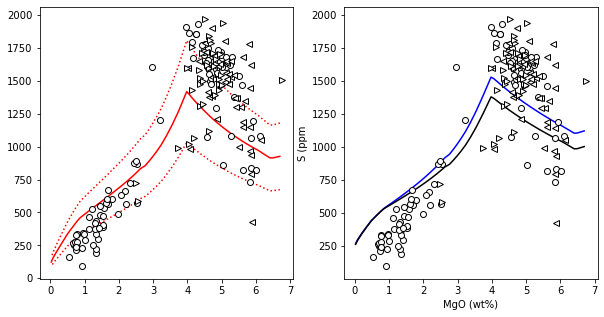

In [103]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['SCSS2_ppm'], '-b')
ax1.plot(ONeill_CalcSmythe_Sulf['MgO_Liq'], ONeill_CalcSmythe_Sulf['SCSS2_ppm'], '-k')
ax1.plot(Plag_MIs['MgO'], Plag_MIs['S_MI EPMA (ppm)']*PEC_Corr_Plag, 'ok', mfc='white')  
ax1.plot(Cpx_MIs['MgO'], Cpx_MIs['S_MI EPMA (ppm)']*PEC_Corr_Cpx, '<k', mfc='white') 
ax1.plot(Opx_MIs['MgO'], Opx_MIs['S_MI EPMA (ppm)']*PEC_Corr_Opx, '>k', mfc='white')

ax2.plot(Smythe_CalcSulf['MgO_Liq'], Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017'], '-r')
ax2.plot(Smythe_CalcSulf['MgO_Liq'], 
        Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']+Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017_1sigma'], ':r')
ax2.plot(Smythe_CalcSulf['MgO_Liq'], 
        Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']-Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017_1sigma'], ':r')

ax2.plot(Plag_MIs['MgO'], Plag_MIs['S_MI EPMA (ppm)']*PEC_Corr_Plag, 'ok', mfc='white')  
ax2.plot(Cpx_MIs['MgO'], Cpx_MIs['S_MI EPMA (ppm)']*PEC_Corr_Cpx, '<k', mfc='white') 
ax2.plot(Opx_MIs['MgO'], Opx_MIs['S_MI EPMA (ppm)']*PEC_Corr_Opx, '>k', mfc='white')

ax1.set_ylabel('S (ppm')
ax1.set_xlabel('MgO (wt%)')

## 11. We can see that the models underestimate at 4-5 wt% MgO. 
- This could be becuase some S6+ is present, as SCSS models only model the amount of S$^{2-}$ in the melt
- We can use the Nash model to calculate the amount of S6+, which uses the temperature and the proportion of Fe3 (which we estimate from MELTS)

In [104]:
s6St_Nash=ss.calculate_S6St_Nash2019(T_K=Liqs['temp_HT87'], Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])

- We can also use the model of Jugo et al. (2010), which uses offset from the QFM buffer
- We convert our Fe3Fet content into an Fo2 using a function for this

In [105]:
deltaQFM=ss.convert_fe_partition_to_fo2(liq_comps=Liqs, T_K=Liqs['temp_HT87'], P_kbar=0.6).DeltaQFM
s6St_Jugo=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=DeltaQFM)

Text(0, 0.5, 'S$^{6+}$/S$_{T}$')

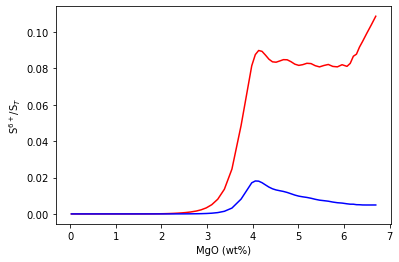

In [106]:
plt.plot(Liqs['MgO_Liq'], s6St_Nash, '-r')
plt.plot(Liqs['MgO_Liq'], s6St_Jugo, '-b')
plt.xlabel('MgO (wt%)')
plt.ylabel('S$^{6+}$/S$_{T}$')

Text(0.5, 0, 'Fe$^{3+}$/Fe$_{T}$')

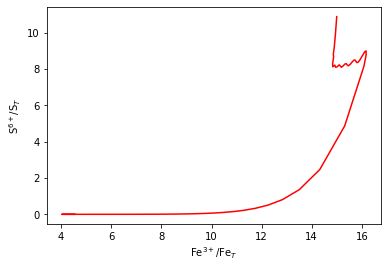

In [107]:
plt.plot(100*Liqs['Fe3Fet_Liq'], 100*s6St_Nash, '-r')
plt.ylabel('S$^{6+}$/S$_{T}$')
plt.xlabel('Fe$^{3+}$/Fe$_{T}$')

Actual data for S and Fe redox from Allan Lerner PhD thesis SB8 par a)
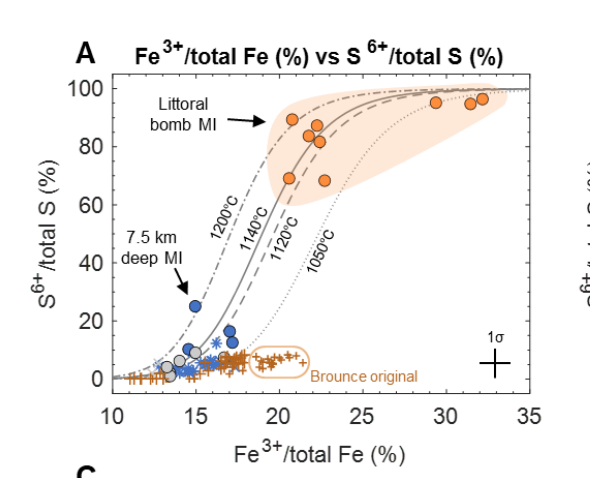

## Applying an S6+ correction using Nash

Text(0.5, 0, 'MgO (wt%)')

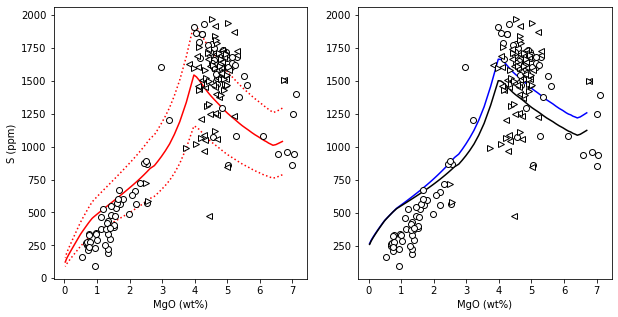

In [108]:
s6_corr_Nash=1/(1-s6St_Nash)
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['SCSS2_ppm']*s6_corr_Nash, '-b')
ax1.plot(ONeill_CalcSmythe_Sulf['MgO_Liq'], ONeill_CalcSmythe_Sulf['SCSS2_ppm']*s6_corr_Nash, '-k')
ax1.plot(Plag_MIs['MgO_MI EPMA'], Plag_MIs['S_MI EPMA (ppm)'], 'ok', mfc='white')  
ax1.plot(Cpx_MIs['MgO_MI EPMA'], Cpx_MIs['S_MI EPMA (ppm)'], '<k', mfc='white') 
ax1.plot(Opx_MIs['MgO_MI EPMA'], Opx_MIs['S_MI EPMA (ppm)'], '>k', mfc='white')

ax2.plot(Smythe_CalcSulf['MgO_Liq'], Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']*s6_corr_Nash, '-r')
ax2.plot(Smythe_CalcSulf['MgO_Liq'], 
        Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']*s6_corr_Nash+Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017_1sigma'], ':r')
ax2.plot(Smythe_CalcSulf['MgO_Liq'], 
        Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']*s6_corr_Nash-Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017_1sigma'], ':r')

ax2.plot(Plag_MIs['MgO_MI EPMA'], Plag_MIs['S_MI EPMA (ppm)'], 'ok', mfc='white')  
ax2.plot(Cpx_MIs['MgO_MI EPMA'], Cpx_MIs['S_MI EPMA (ppm)'], '<k', mfc='white') 
ax2.plot(Opx_MIs['MgO_MI EPMA'], Opx_MIs['S_MI EPMA (ppm)'], '>k', mfc='white')

ax2.set_ylabel('S (ppm)')
ax1.set_xlabel('MgO (wt%)')
ax2.set_xlabel('MgO (wt%)')

## Lets make a synthetic path with 20% S$^{6+}$, tailing off once Fe redox tanks
- We can infer that S6 will drop rapidly once Fe-Ti oxides come on, and decrease Fe3

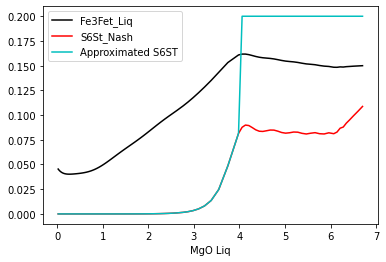

In [109]:
lowMgO=Liqs['MgO_Liq']<4
Liqs['S6ST']=0.2
Liqs.loc[lowMgO, 'S6ST']=s6St_Nash.loc[lowMgO]
    
plt.plot(Liqs['MgO_Liq'], Liqs['Fe3Fet_Liq'], '-k', label='Fe3Fet_Liq')
plt.plot(Liqs['MgO_Liq'], s6St_Nash, '-r', label='S6St_Nash')
plt.plot(Liqs['MgO_Liq'], Liqs['S6ST'], '-c', label='Approximated S6ST')

plt.xlabel('MgO Liq')
plt.legend()

## Applying a correction to 4 wt%, where redox tanks

Text(0.5, 0, 'MgO (wt%)')

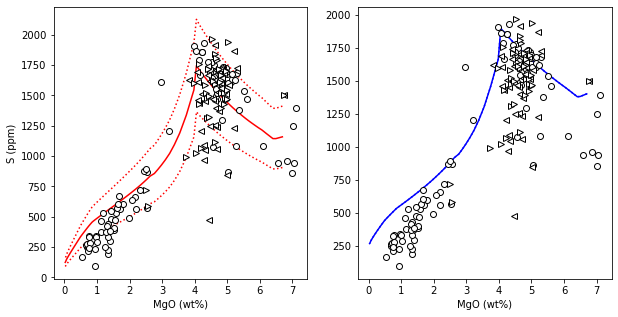

In [110]:
s6_corr_syn=1/(1-Liqs['S6ST'])
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn, ':b')

ax1.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn, '-b')

ax2.plot(Smythe_CalcSulf['MgO_Liq'], Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']*s6_corr_syn, '-r')
ax2.plot(Smythe_CalcSulf['MgO_Liq'], 
        Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']*s6_corr_syn+Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017_1sigma'], ':r')
ax2.plot(Smythe_CalcSulf['MgO_Liq'], 
        Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017']*s6_corr_syn-Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017_1sigma'], ':r')

ax2.plot(Plag_MIs['MgO_MI EPMA'], Plag_MIs['S_MI EPMA (ppm)'], 'ok', mfc='white')  
ax2.plot(Cpx_MIs['MgO_MI EPMA'], Cpx_MIs['S_MI EPMA (ppm)'], '<k', mfc='white') 
ax2.plot(Opx_MIs['MgO_MI EPMA'], Opx_MIs['S_MI EPMA (ppm)'], '>k', mfc='white')
ax1.plot(Plag_MIs['MgO_MI EPMA'], Plag_MIs['S_MI EPMA (ppm)'], 'ok', mfc='white')  
ax1.plot(Cpx_MIs['MgO_MI EPMA'], Cpx_MIs['S_MI EPMA (ppm)'], '<k', mfc='white') 
ax1.plot(Opx_MIs['MgO_MI EPMA'], Opx_MIs['S_MI EPMA (ppm)'], '>k', mfc='white')

ax2.set_ylabel('S (ppm)')
ax1.set_xlabel('MgO (wt%)')
ax2.set_xlabel('MgO (wt%)')


## Calculating amount of S precipitated. 
- Loading in "factor" which is basically tracking how much elements are increasing due to fractional crystallization

(0.0, 3000.0)

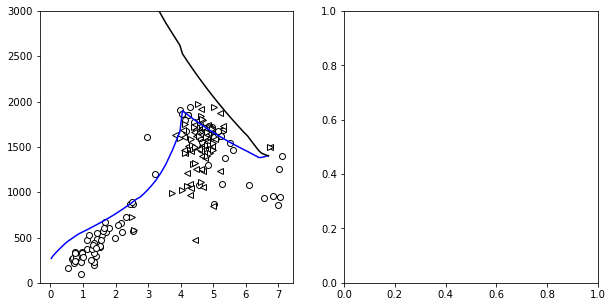

In [111]:
S_Incomp=1400*MELTS['Factor']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Plag_MIs['MgO_MI EPMA'], Plag_MIs['S_MI EPMA (ppm)'], 'ok', mfc='white')  
ax1.plot(Cpx_MIs['MgO_MI EPMA'], Cpx_MIs['S_MI EPMA (ppm)'], '<k', mfc='white') 
ax1.plot(Opx_MIs['MgO_MI EPMA'], Opx_MIs['S_MI EPMA (ppm)'], '>k', mfc='white')


ax1.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn, '-b')
ax1.plot(MELTS['MgO'], S_Incomp, '-k')

ax1.set_ylim([0, 3000])

## Mass Balance functions

In [112]:
F=1/MELTS['Factor']

In [48]:
def crystallize_S_incomp(S_init=1200, X_melt=None):
    S_melt_FC=S_init/X_melt
    return S_melt_FC

In [121]:
def calculate_mass_frac_sulf(SCSS=None, S_init=None, F=None, S_sulf=None):
    X_sulf=(S_init-F*SCSS)/S_sulf
    return X_sulf

In [122]:
len(ONeill_CalcSulf['SCSS2_ppm'])

124

In [123]:
Calc_Mass=calculate_mass_frac_sulf(SCSS=ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn,
                         S_init=ONeill_CalcSulf['SCSS2_ppm'].iloc[0]*s6_corr_syn.iloc[0],
                         F=F,
                         S_sulf=np.mean(Sulfide_in['S'])*10000)

In [124]:
Liqs.columns

Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq',
       'Ni_Liq_ppm', 'Cu_Liq_ppm', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO',
       'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'Temp (K) MELTS', 'FeO',
       'Fe2O3', 'H2O_Incom', 'Temp_HT1987_C', 'Factor', 'H2O_test',
       'temp_HT87', 'Ni_modelled', 'Cu_modelled', 'S6ST'],
      dtype='object')

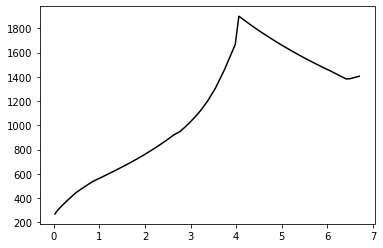

In [125]:
plt.plot(Liqs['MgO'],ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn, '-k')

In [126]:
np.mean(Sulfide_in['S'])*10000

283533.3333333334

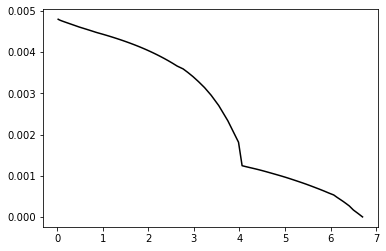

In [127]:
plt.plot(Liqs['MgO'],Calc_Mass, '-k')

In [132]:
Calc_Mass*320000

0         0.000000
1        26.251440
2        53.634342
3        85.125076
4       102.687897
          ...     
119    1531.406731
120    1532.251812
121    1533.063891
122    1534.049116
123    1535.303820
Length: 124, dtype: float64

## Amount of sulfide precipitated
- Can write as a mass balance.

S$_{Tot}$ = S$_{Melt}$* (2-X$_{sulf}$) + S$_{sulf}$*(X$_{sulf}$)

X$_{sulf}$ = (S$_{Tot}$  - S$_{Melt}$ )/(S$_{sulf}$ - S$_{Melt}$)

In [129]:
# Mean S in sulfide
S_sulf=np.mean(Sulfide_in['S'])*10000
S_sulf

283533.3333333334

In [130]:
X_sulf= (S_Incomp-ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn)/(S_sulf-ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn)

Text(0, 0.5, 'Sulf frac')

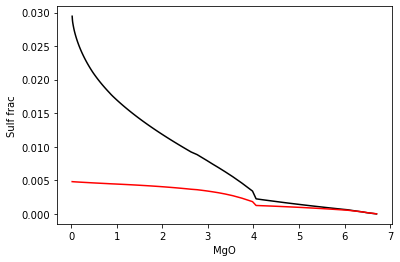

In [131]:
plt.plot(MELTS['MgO'], X_sulf, '-k')
plt.plot(MELTS['MgO'],Calc_Mass, '-r')
plt.xlabel('MgO')
plt.ylabel('Sulf frac')

## This needs work, but this is just a quick proof of concept
- have asked emma if she is interested in this

In [ ]:
# Steorological corrections from Higgins et al. (2000) - 

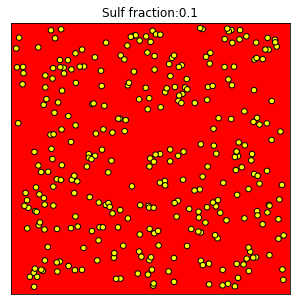

In [47]:
from matplotlib import patches
x_len_mm=1
y_len_mm=1
rect = patches.Rectangle((0,0),x_len_mm,y_len_mm,linewidth=1,edgecolor='r',facecolor='red', label='test')
fig, (ax1) = plt.subplots(1, 1, figsize=(5,5), sharey=True)
# Add the patch to the Axes
ax1.add_patch(rect)

area_rect=x_len_mm*y_len_mm
Vol_frac=0.1
area_sulf=area_rect*Vol_frac
sulf_rad=10*10**(-3)
area_1sulf=np.pi*sulf_rad**2
number_sulf=area_sulf/area_1sulf
circ1=patches.Circle((0.5, 0.5), sulf_rad, edgecolor='k', facecolor='yellow')
ax1.add_patch(circ1)
for i in range(0, int(np.round(number_sulf))):
    circ=patches.Circle((np.random.uniform(0.02, 0.98), np.random.uniform(0.02, 0.98)),
                        sulf_rad, edgecolor='k', facecolor='yellow')
    ax1.add_patch(circ)
    
ax1.set_title('Sulf fraction:' + str(Vol_frac))

ax1.axes.yaxis.set_visible(False)
ax1.axes.xaxis.set_visible(False)

In [20]:
np.round(number_sulf)

32.0